<a href="https://colab.research.google.com/github/jeffhoro/Portfolio/blob/main/Linear_Regression_Boston_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Machine Learning - Linear Regression**

Simple linear regression using the Boston housing data available at (https://lib.stat.cmu.edu/datasets/boston).

###Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

###Read in Data

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
data = pd.DataFrame(data)
data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

###Exploratory Data Analysis

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
data.shape

(506, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
data.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


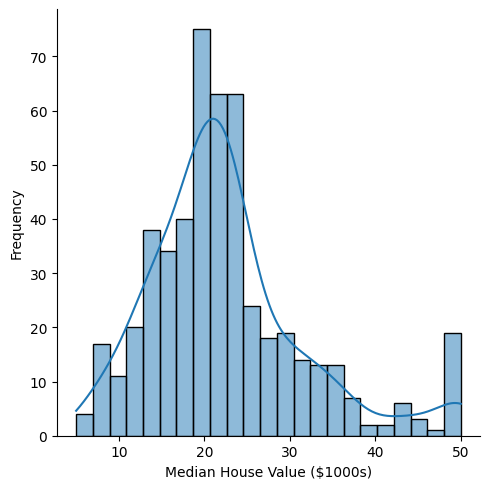

In [ ]:
# check the distribution of the target
sns.displot(data['MEDV'], kde=True)
plt.xlabel('Median House Value ($1000s)')
plt.ylabel('Frequency')
plt.show()

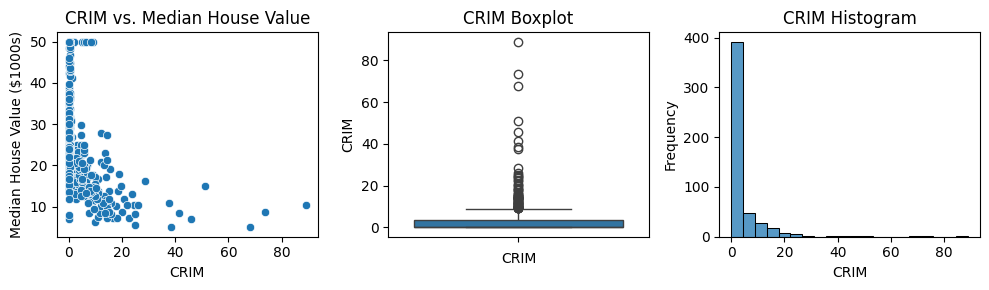

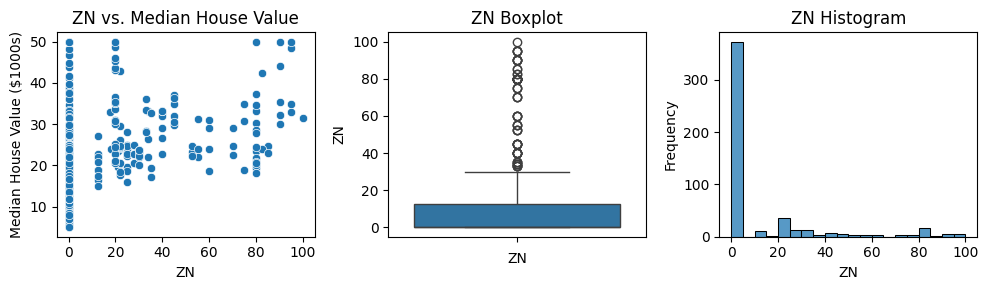

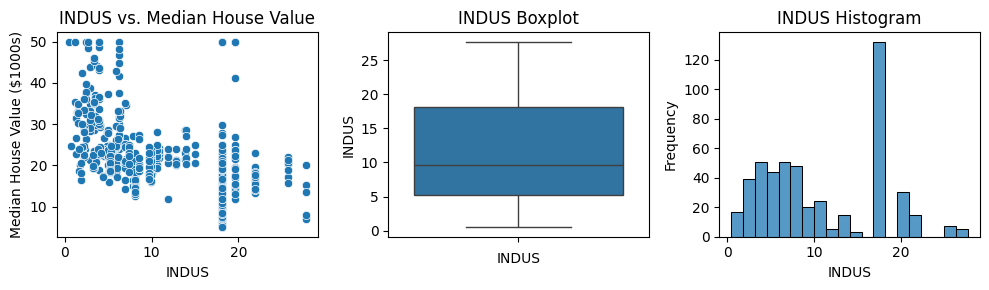

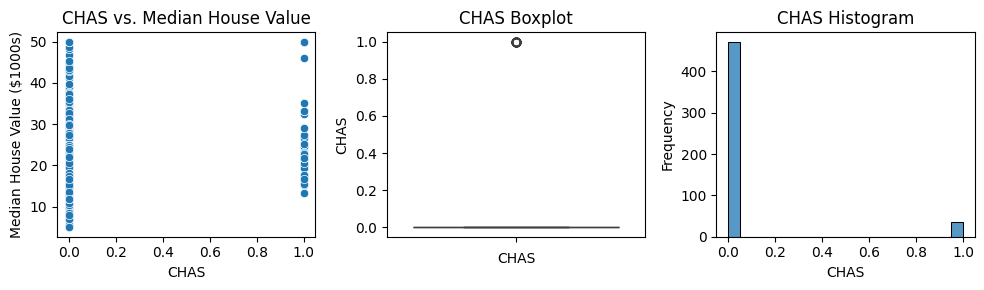

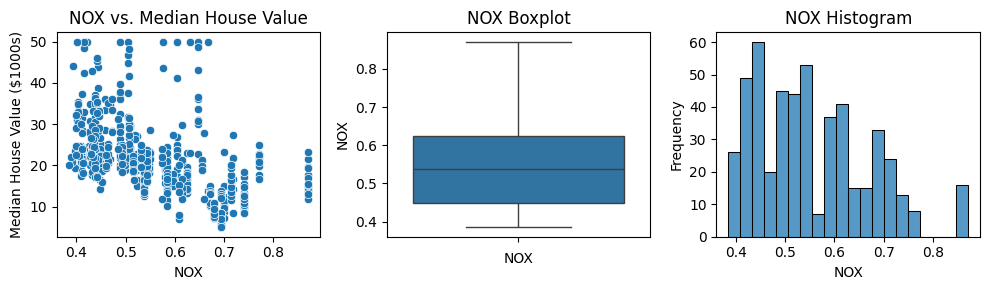

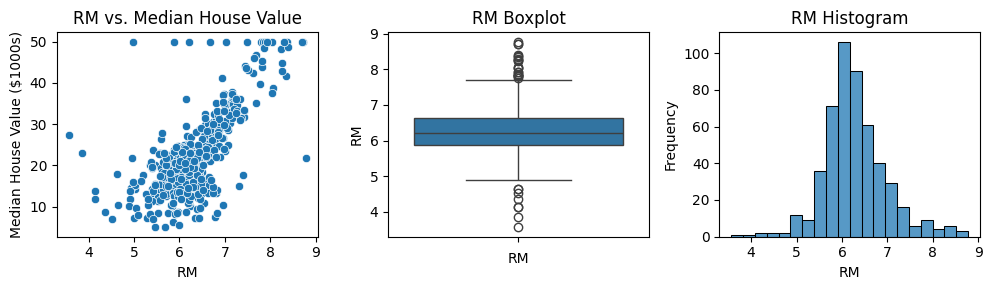

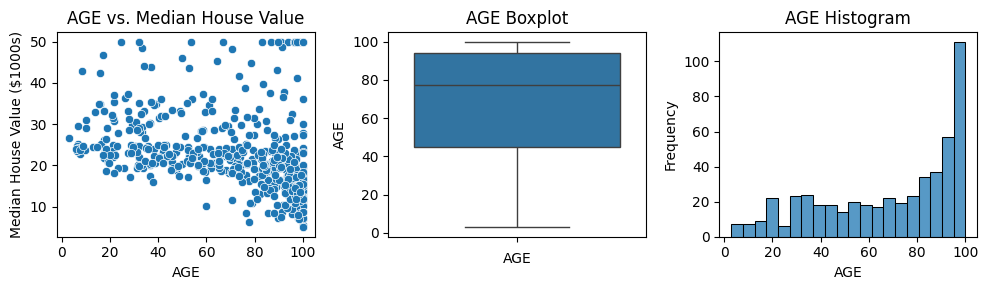

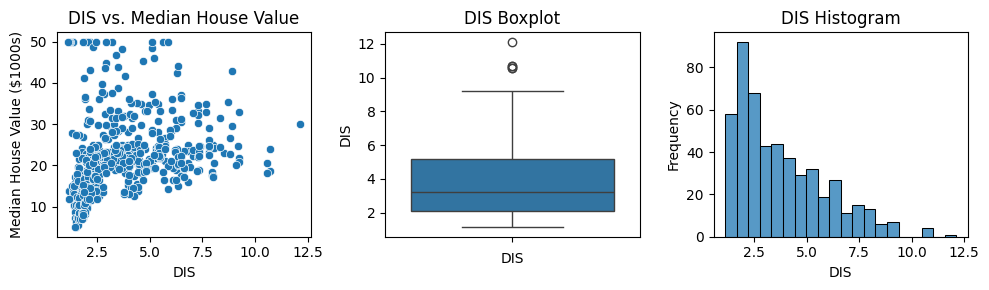

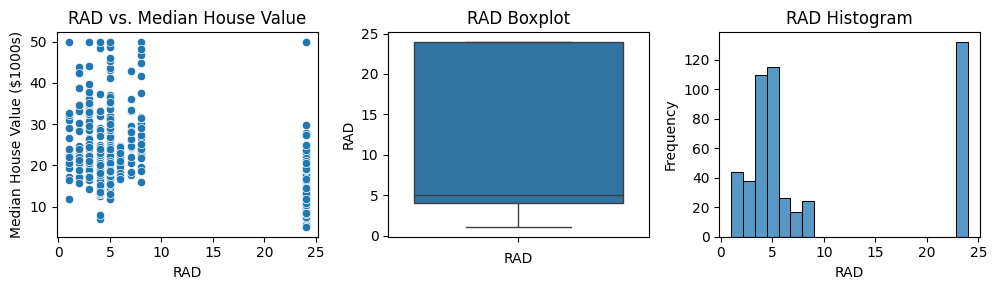

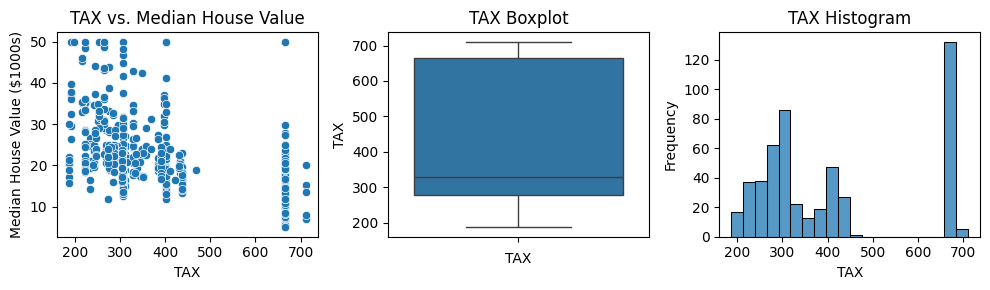

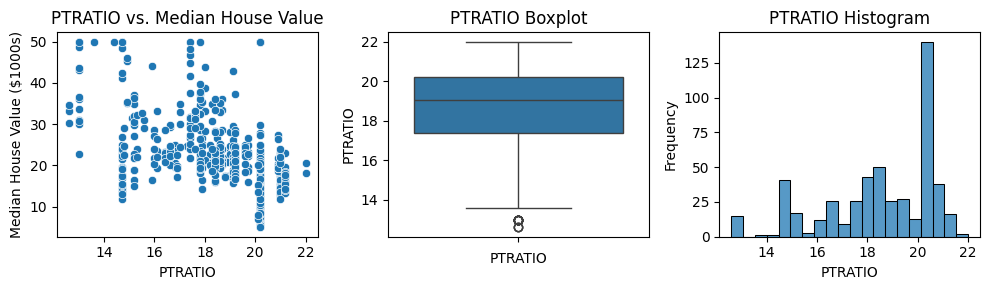

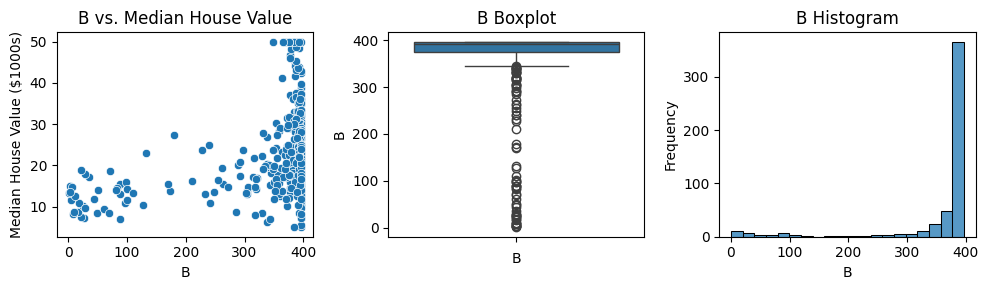

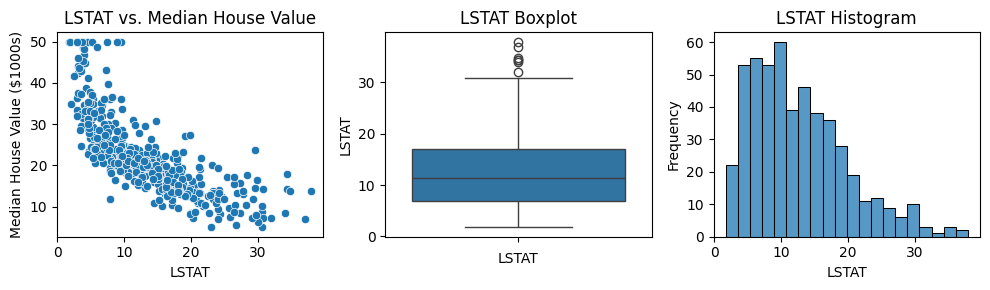

In [ ]:
# visualize the features

features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
for feature in features:
  fig, axes = plt.subplots(1, 3, figsize=(10, 3))
  #scatter plot
  sns.scatterplot(x=data[feature], y=data['MEDV'], ax=axes[0])
  axes[0].set_xlabel(feature)
  axes[0].set_ylabel('Median House Value ($1000s)')
  axes[0].set_title(f'{feature} vs. Median House Value')

  #box plot
  sns.boxplot(y=data[feature], ax=axes[1])
  axes[1].set_xlabel(feature)
  axes[1].set_title(f'{feature} Boxplot')

  #histogram
  sns.histplot(data[feature], bins=20, kde=False, ax=axes[2])
  axes[2].set_xlabel(feature)
  axes[2].set_ylabel('Frequency')
  axes[2].set_title(f'{feature} Histogram')

  plt.tight_layout()
  plt.show()

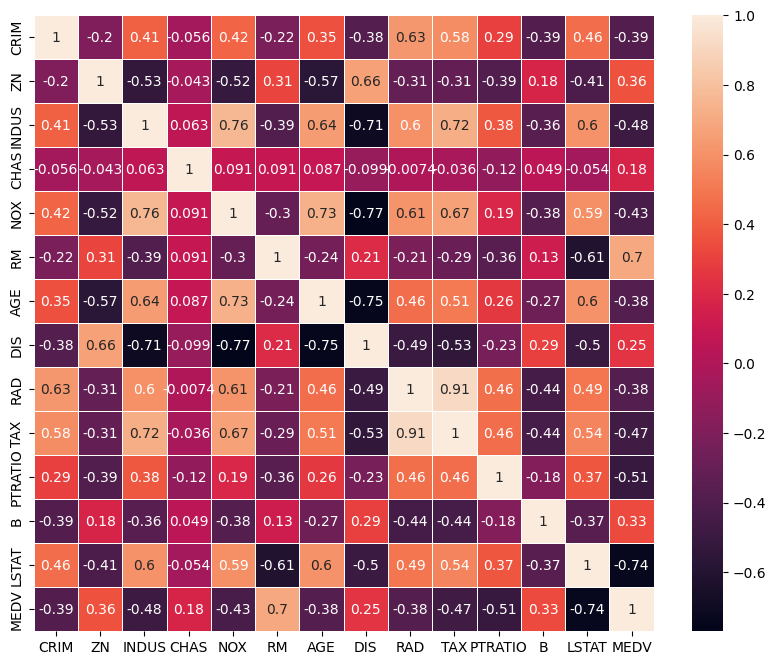

In [ ]:
# correlation heatmap
fig, axes = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(), linewidth=0.5, annot=True)
plt.show()

###Build the Model

In [ ]:
# define target and features for the model
X = data.drop('MEDV', axis=1)
y = data['MEDV']

In [ ]:
# check the shape of the target and features
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [ ]:
#split data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [ ]:
# initialize and fit the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
#training prediction
pred_train = lm.predict(X_train)

#testing prediction
pred_test = lm.predict(X_test)

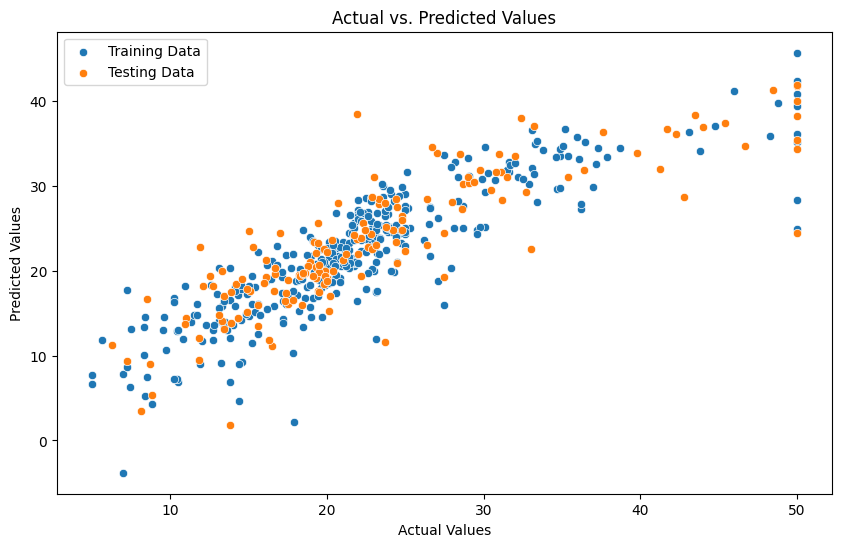

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x=y_train, y=pred_train)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

sns.scatterplot(x=y_test, y=pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

plt.legend(['Training Data', 'Testing Data'])
plt.show()


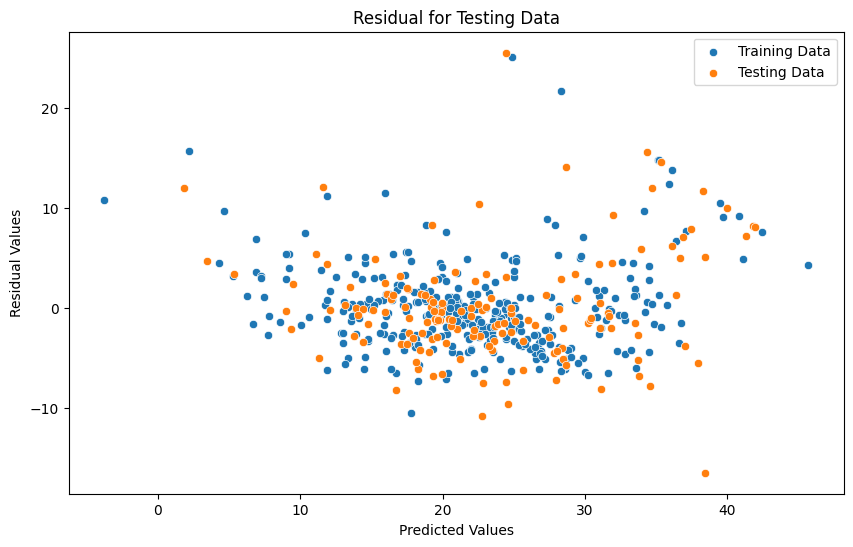

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x=pred_train, y=y_train - pred_train)
plt.xlabel('Predicted Values')
plt.ylabel('Residual Values')

sns.scatterplot(x=pred_test, y=y_test - pred_test)
plt.xlabel('Predicted Values')
plt.ylabel('Residual Values')
plt.title('Residual for Testing Data')

plt.legend(['Training Data', 'Testing Data'])
plt.show()

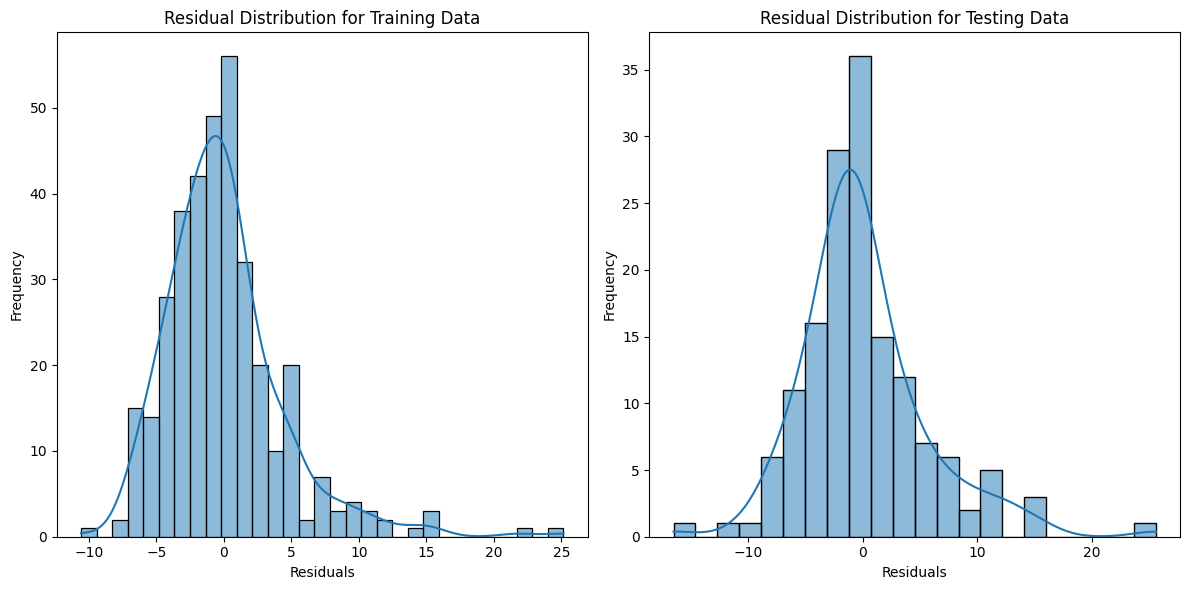

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12, 6))
sns.histplot(y_train - pred_train, kde=True, ax=axes[0])
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Residual Distribution for Training Data')

sns.histplot(y_test - pred_test, kde=True, ax=axes[1])
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Residual Distribution for Testing Data')

plt.tight_layout()
plt.show()

### Model Evaluation

In [ ]:
#training model evaluation
train_r2 = r2_score(y_train, pred_train)
train_adj_r2 = 1 - (1-r2_score(y_train, pred_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
train_mae = mean_absolute_error(y_train, pred_train)
train_mse = mean_squared_error(y_train, pred_train)
train_rmse = np.sqrt(mean_squared_error(y_train, pred_train))

#test model evaluation
test_r2 = r2_score(y_test, pred_test)
test_adj_r2 = 1 - (1-r2_score(y_test, pred_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
test_mae = mean_absolute_error(y_test, pred_test)
test_mse = mean_squared_error(y_test, pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, pred_test))

In [ ]:
evaluation_metrics = pd.DataFrame({'Training': [train_r2, train_adj_r2, train_mae, train_mse, train_rmse],
                                   'Testing': [test_r2, test_adj_r2, test_mae, test_mse, test_rmse]})

In [ ]:
evaluation_metrics.index = ['R2', 'Adjusted R2', 'MAE', 'MSE', 'RMSE']

In [ ]:
evaluation_metrics

,Training,Testing
R2,0.746599,0.712182
Adjusted R2,0.736910,0.685069
MAE,3.089861,3.859006
MSE,19.073689,30.053993
RMSE,4.367343,5.482152
